# 分析用户窃电行为

## 导入常用库

In [132]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 读取数据文件
- 可以发现数据量是非常巨大的，如何进行数据预处理成为主要问题

In [133]:
data = pd.read_csv('res/data1.csv')
data_columns = np.array(data.columns)       # 获取列的名字
data.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


## 用户偷电比例可视化

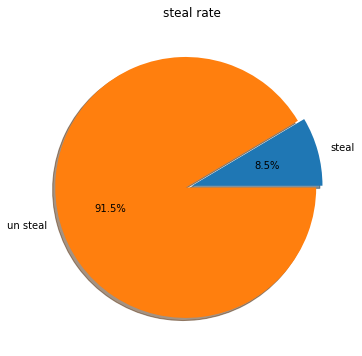

In [134]:
x = np.array([data['FLAG'].sum(),len(data)-data['FLAG'].sum()])

plt.figure(figsize=(6,6))
plt.title("steal rate")
plt.pie(x=x,autopct='%1.1f%%',shadow=True,labels=['steal','un steal'],explode=[0,0.05])
plt.show()

## 数据处理

### 统计每一列的空值
- 空值极差为16502-345=16157
- 故不可以直接使用dropna，应该分组独立计算FLAG=1|0的其他列的均值，然后使用均值填写空值

In [135]:
data.isnull().sum()

CONS_NO          0
FLAG             0
2014/1/1     16502
2014/1/10    16460
2014/1/11    16461
             ...  
2016/9/5       499
2016/9/6       522
2016/9/7       405
2016/9/8       328
2016/9/9       345
Length: 1036, dtype: int64

### 直接去掉空值
- 可知不可以直接去掉空值

In [136]:
new_data = data.dropna()               # 去空值
new_data.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9


### 对数据项的空值进行填值处理
- 怎么填值
  - 对每一列根据FLAG进行分组计算平均值mean,然后填写
  - 根据均值可以发现，窃电用户的平均用电量远远大于正常用户的平均用电量

In [137]:
deal_columns = data_columns[2:]             # 只对时间结点进行处理
deal_data = data.copy()                     # 获取数据的拷贝
mean_df = deal_data.groupby(['FLAG']).mean()  # 获取分组后的平均值
mean_df

,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,2014/1/18,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
FLAG,,,,,,,,,,,,,,,,,,,,,
0,6.203047,5.726994,5.735261,6.155989,6.137078,6.208530,6.343761,6.147889,6.051591,6.167708,...,7.149005,7.442425,8.456100,7.832880,8.824003,8.927932,9.001231,8.775083,8.482857,8.200030
1,17.942871,20.593478,18.446413,17.401622,59.164561,18.462834,18.443294,18.391507,15.587881,16.884158,...,27.132284,29.788123,36.015848,32.797285,36.930742,39.503887,40.668339,39.252568,38.907474,38.110143


#### 开始填值

In [138]:
mean_array = np.array(mean_df)          # 获取一个二维数组

# i = 0
# for col_name in deal_columns:           # 填空值处理过程，耗时比较久,这个耗时太久了，不好用，直接填0，吐了
#     for j in range(len(deal_data)):
#         if(deal_data.at[j,'FLAG']==0):
#             if(np.isnan(deal_data.at[i,col_name])):
#                 deal_data.at[i,col_name] = mean_array[0,i]
#         else:
#             if(np.isnan(deal_data.at[i,col_name])):
#                 deal_data.at[i,col_name] = mean_array[1,i]
#     i+=1

deal_data.fillna(value=0,inplace=True)

## 数据可视化

In [165]:
view_columns = list(deal_columns[:31])
j_month = [view_columns[0],view_columns[11],view_columns[22]]
j_month += view_columns[25:]
j_month += view_columns[1:11]
j_month += view_columns[12:22]
j_month += view_columns[23:25]
j_month.append('FLAG')
j_month = np.array(j_month)
j_month

array(['2014/1/1', '2014/1/2', '2014/1/3', '2014/1/4', '2014/1/5',
       '2014/1/6', '2014/1/7', '2014/1/8', '2014/1/9', '2014/1/10',
       '2014/1/11', '2014/1/12', '2014/1/13', '2014/1/14', '2014/1/15',
       '2014/1/16', '2014/1/17', '2014/1/18', '2014/1/19', '2014/1/20',
       '2014/1/21', '2014/1/22', '2014/1/23', '2014/1/24', '2014/1/25',
       '2014/1/26', '2014/1/27', '2014/1/28', '2014/1/29', '2014/1/30',
       '2014/1/31', 'FLAG'], dtype='<U9')

In [166]:
j_data = deal_data[j_month]
j_data[j_month[0:10]].head()

,2014/1/1,2014/1/2,2014/1/3,2014/1/4,2014/1/5,2014/1/6,2014/1/7,2014/1/8,2014/1/9,2014/1/10
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42


In [168]:
mean = j_data.groupby(['FLAG']).mean()
mean

,2014/1/1,2014/1/2,2014/1/3,2014/1/4,2014/1/5,2014/1/6,2014/1/7,2014/1/8,2014/1/9,2014/1/10,...,2014/1/22,2014/1/23,2014/1/24,2014/1/25,2014/1/26,2014/1/27,2014/1/28,2014/1/29,2014/1/30,2014/1/31
FLAG,,,,,,,,,,,,,,,,,,,,,
0,3.799901,3.775898,3.476556,3.625432,3.819596,3.626585,3.558982,3.565262,3.565388,3.512858,...,4.015824,4.049193,3.936290,3.915377,3.935457,3.890299,3.767315,3.875572,4.132719,3.369591
1,10.562221,10.027502,10.713737,12.933823,11.975242,10.795560,13.898180,10.958025,11.629414,12.185187,...,9.835831,8.944556,8.473956,149.966633,8.033452,7.603541,6.407394,5.961051,6.325833,5.547062


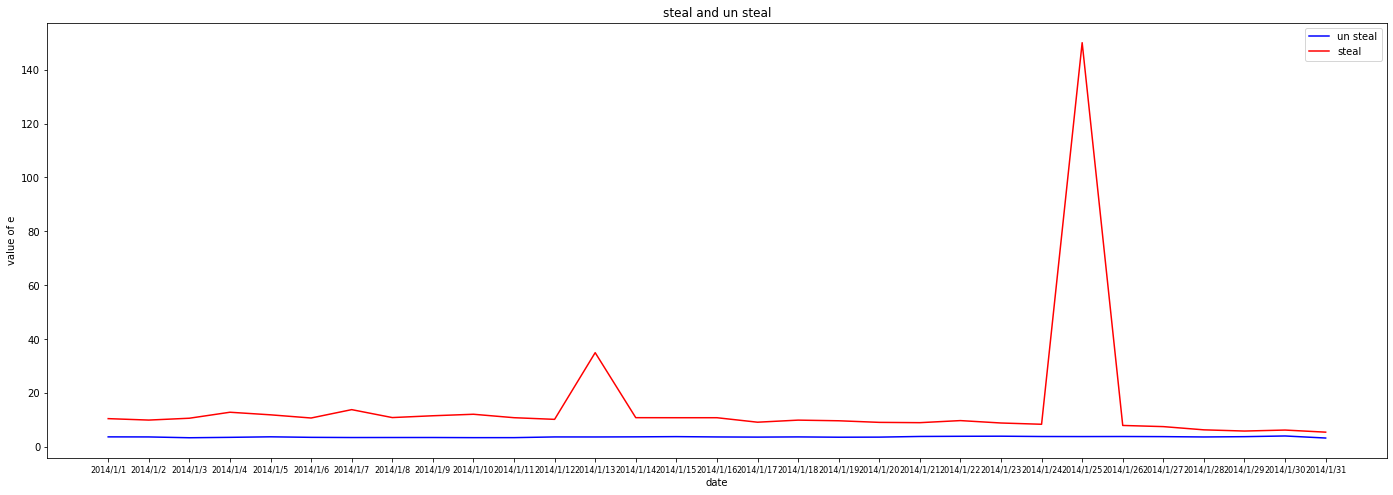

In [188]:
mean_df = np.array(mean)
mean_df

x = j_month[:31]
x = np.array(x)
y1,y2 = mean_df[0,:],mean_df[1,:]

plt.figure(figsize=(24,8))
plt.title('steal and un steal')
plt.xlabel('date')
plt.ylabel('value of e')
plt.xticks(fontsize=8)
plt.plot(x,y1,c='b',label='un steal')
plt.plot(x,y2,c='r',label='steal')
plt.legend(loc='best')
plt.show()